## Testbank in one Set

Change your models in their definition and run the test

In [34]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.neymotin import iteration2

reload(iteration2)
reload(generic)
reload(rheobase)
Cell = iteration2.SPI6
Config = iteration2.Config

def HSoma():
    config = Config(h_somaModifier=2.00)
    return Cell(config)

def AIS():
    config = Config(aisL = 34)
    return Cell(config)

def Synapses():
    config = Config(nsynapses=20)
    return Cell(config)

def Default():
    config = Config()
    return Cell(config)

def Combined():
    config = Config(aisL = 34,h_somaModifier=2.00, nsynapses=20)
    return Cell(config)


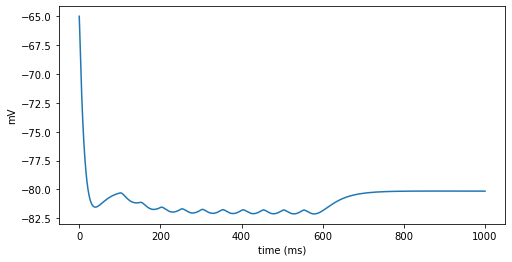

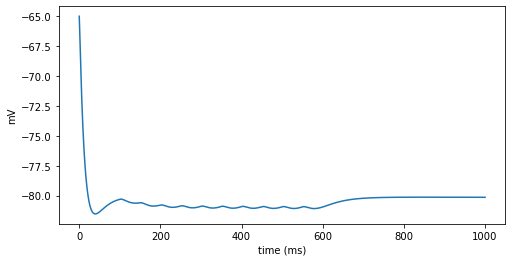

In [32]:

reload(generic)
dur = 500
delay = 100
amp = 0

params = [
    { "dur": dur, "delay": delay, "amp": 0, "cell": Synapses},
    { "dur": dur, "delay": delay, "amp": 0, "cell": Default},
]
for param in params:
    trace = generic.stimulate(param["cell"], param)
    generic.plotTrace(trace)

In [33]:
def testbank(*args, precisiondigits=4, apthreshold = 10):
    results = []
    for cellbuilder in args:
        result = {}
        print(f"Calcuting Rhoebase for {cellbuilder.__name__}")
        undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=precisiondigits, apthreshold = apthreshold, plot=True) # We have a different apc threshold here
        result["name"] = cellbuilder.__name__
        result["rheo"] = (undertrace, overtrace)
              
        print(f"Calcuting RMP for {cellbuilder.__name__}")
        result["rmp"] = rmp.calculateRMP(cellbuilder, plot=False)
        result["ap-voltage"] = ap.calculateAPThresholdAndDerivative(overtrace)
        results.append(result)
        
    return results

In [26]:
reload(rheobase)
def testRheo(*args, precisiondigits=4, apthreshold = 10):
    for cellbuilder in args:
        result = {}
        print(f"Calcuting Rhoebase for {cellbuilder.__name__}")
        undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=precisiondigits, apthreshold = apthreshold, doprint= True, plot = True) # We have a different apc threshold here

Calcuting Rhoebase for Synapses
Intial guess -0.2
Running in range  0.06000000000000001 from  -0.2 to  0.9400000000000002
0 20 -0.2 []
1 20 -0.14 []
2 20 -0.07999999999999999 []
3 20 -0.019999999999999962 []
4 20 0.040000000000000036 []
5 20 0.10000000000000003 []
6 20 0.1600000000000001 []
7 20 0.22000000000000008 [147.1]
[147.1]
Detected first AP at 0.22000000000000008  [mv]
Intial guess 0.1600000000000001
Running in range  0.004800000000000002 from  0.1552000000000001 to  0.24640000000000012
0 20 0.1552000000000001 []
1 20 0.1600000000000001 []
2 20 0.16480000000000009 []
3 20 0.16960000000000008 []
4 20 0.1744000000000001 []
5 20 0.1792000000000001 []
6 20 0.1840000000000001 []
7 20 0.1888000000000001 []
8 20 0.1936000000000001 []
9 20 0.1984000000000001 []
10 20 0.2032000000000001 []
11 20 0.20800000000000013 []
12 20 0.2128000000000001 [180.]
[180.]
Detected first AP at 0.2128000000000001  [mv]
Intial guess 0.20800000000000013
Running in range  0.0006240000000000003 from  0.20737

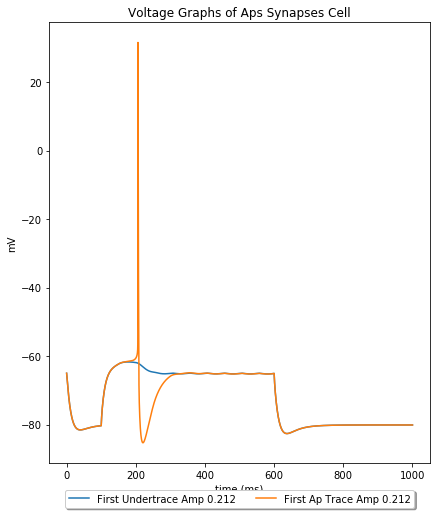

In [27]:
testRheo(Synapses)

Calcuting Rhoebase for Default
Intial guess -0.2
Running in range  0.06000000000000001 from  -0.2 to  0.9400000000000002
0 20 -0.2 []
1 20 -0.14 []
2 20 -0.07999999999999999 []
3 20 -0.019999999999999962 []
4 20 0.040000000000000036 []
5 20 0.10000000000000003 []
6 20 0.1600000000000001 []
7 20 0.22000000000000008 [142.1   291.725 451.3  ]
[142.1   291.725 451.3  ]
Detected first AP at 0.22000000000000008  [mv]
Intial guess 0.1600000000000001
Running in range  0.004800000000000002 from  0.1552000000000001 to  0.24640000000000012
0 20 0.1552000000000001 []
1 20 0.1600000000000001 []
2 20 0.16480000000000009 []
3 20 0.16960000000000008 []
4 20 0.1744000000000001 []
5 20 0.1792000000000001 []
6 20 0.1840000000000001 []
7 20 0.1888000000000001 []
8 20 0.1936000000000001 []
9 20 0.1984000000000001 []
10 20 0.2032000000000001 []
11 20 0.20800000000000013 []
12 20 0.2128000000000001 [154.375]
[154.375]
Detected first AP at 0.2128000000000001  [mv]
Intial guess 0.20800000000000013
Running in r

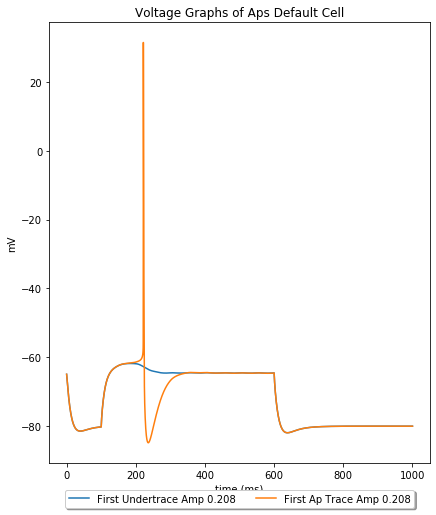

In [28]:
testbank(Default,HSoma,AISHSoma)

Calcuting Rhoebase for Default
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.2128000000000001  [mA]
Detected first AP at 0.20862400000000011  [mA]
Detected first AP at 0.20806240000000015  [mA]


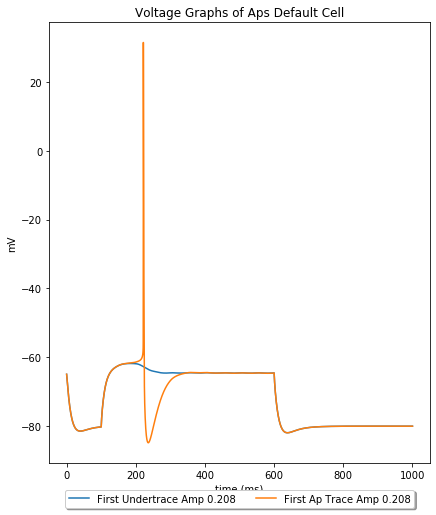

Calcuting RMP for Default
Calcuting Rhoebase for AIS
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.20800000000000013  [mA]
Detected first AP at 0.20746720000000013  [mA]
Detected first AP at 0.2070437718400001  [mA]


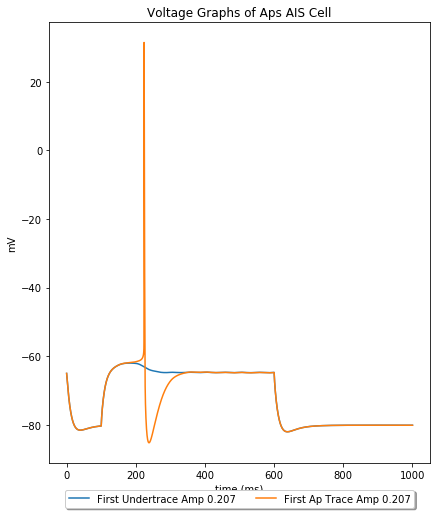

Calcuting RMP for AIS
Calcuting Rhoebase for HSoma
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.20800000000000013  [mA]
Detected first AP at 0.20502880000000012  [mA]
Detected first AP at 0.2048484803200001  [mA]


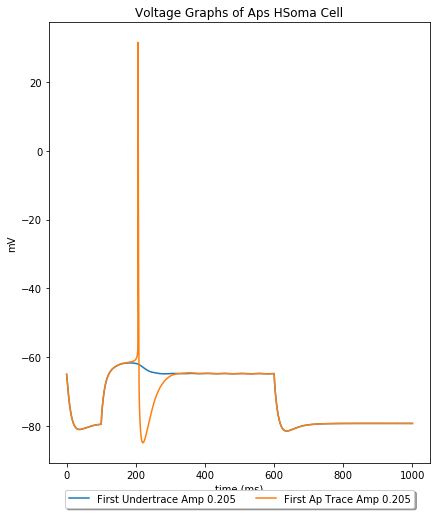

Calcuting RMP for HSoma
Calcuting Rhoebase for Synapses
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.2128000000000001  [mA]
Detected first AP at 0.21299200000000013  [mA]
Detected first AP at 0.2124317104000001  [mA]


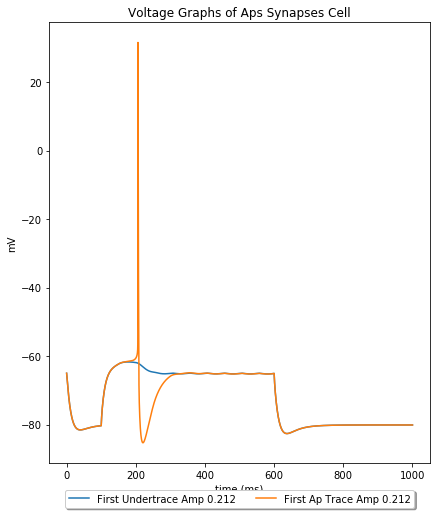

Calcuting RMP for Synapses
Calcuting Rhoebase for Combined
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.2128000000000001  [mA]
Detected first AP at 0.20862400000000011  [mA]
Detected first AP at 0.20806240000000015  [mA]


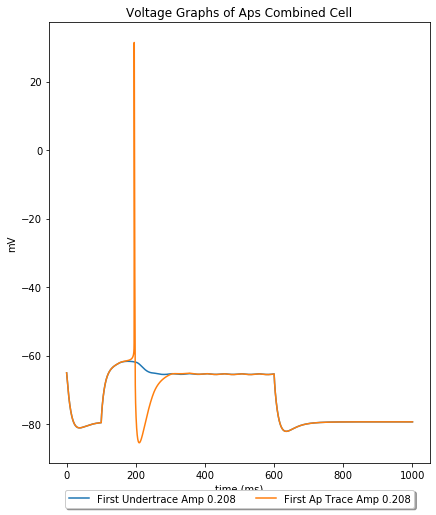

Calcuting RMP for Combined


In [35]:
results = testbank(Default,AIS,HSoma,Synapses,Combined)

In [23]:
results += testbank(Default, AIS)

Calcuting Rhoebase for Default
Calcuting RMP for Default
Calcuting Rhoebase for AIS
Calcuting RMP for AIS


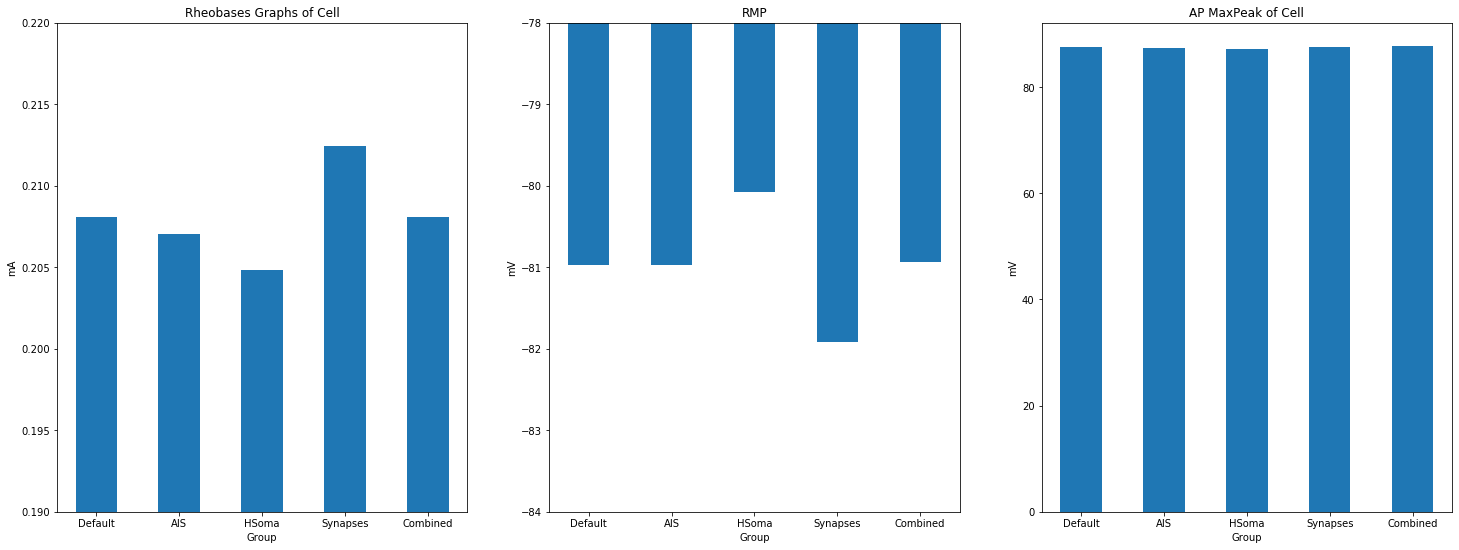

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plotTestbank(results):
    
    fig = plt.figure(figsize=(25,9)) # Default figsize is (8,6)
    names = [ item["name"] for item in results]
    index = np.arange(len(names))
    rheos = [ item["rheo"] for item in results]
    rmps = [ item["rmp"] for item in results]
    aps = [ item["ap-voltage"] for item in results]
    
    #Rheobase
    width = 0.5   
    ax = plt.subplot(131)
    ax.bar(index, [item[1]["params"]["amp"] for item in rheos], width)
    ax.set_xlabel('Group')
    ax.set_xticks(index)
    ax.set_xticklabels(names)
    ax.set_ylabel('mA')
    ax.set_ylim([0.19,0.22])
    ax.set_title("Rheobases Graphs of Cell")
    
    #Resting Potential
    ax2 = plt.subplot(132)
    ax2.bar(index, [item for item in rmps], width)
    ax2.set_xlabel('Group')
    ax2.set_xticks(index)
    ax2.set_xticklabels(names)
    ax2.set_ylabel('mV')
    ax2.set_ylim([-84,-78])
    ax2.set_title("RMP")
    
    #FirstOver20Value
    ax3 = plt.subplot(133)
    ax3.bar(index, [ abs(item["peakValue"] - item["firstOver20Value"]) for item in aps], width)
    ax3.set_xlabel('Group')
    ax3.set_xticks(index)
    ax3.set_xticklabels(names)
    ax3.set_ylabel('mV')
    ax3.set_title("AP MaxPeak of Cell")
        
    plt.show()
    
plotTestbank(results)    

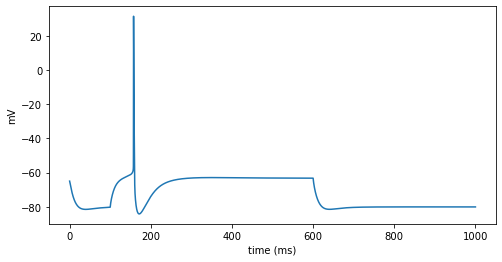

In [7]:
generic.plotTrace(results[0]["rheo"][1])

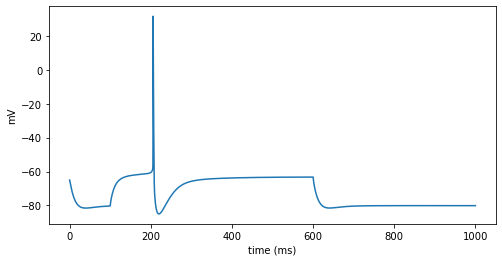

In [11]:
generic.plotTrace(results[3]["rheo"][1])

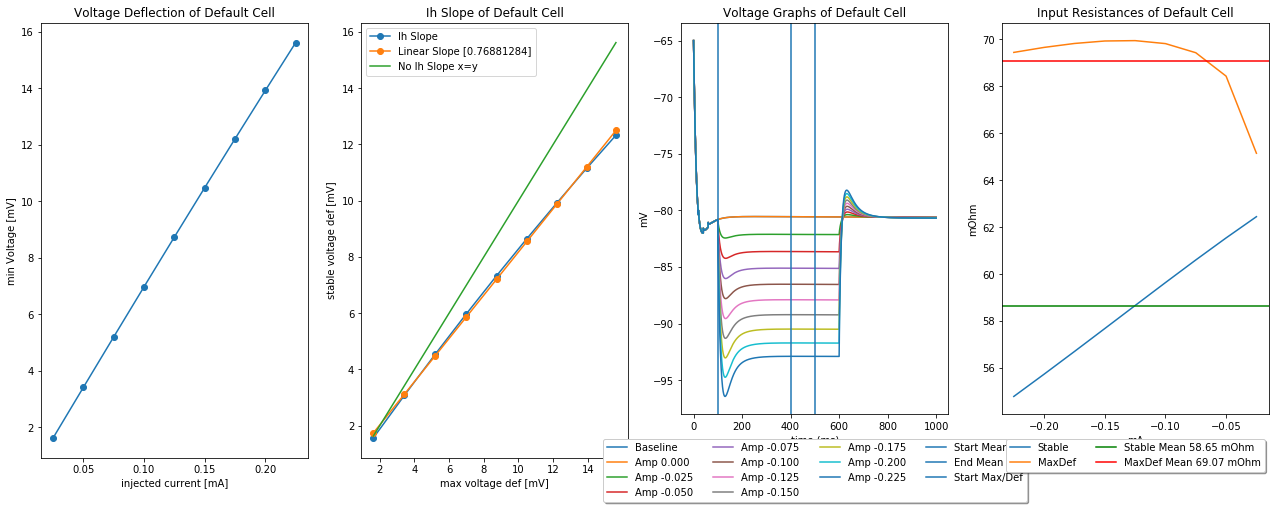

array([[-2.50000000e-02,  6.24460116e+01,  6.51461346e+01],
       [-5.00000000e-02,  6.15421649e+01,  6.84290756e+01],
       [-7.50000000e-02,  6.06032033e+01,  6.94259529e+01],
       [-1.00000000e-01,  5.96404467e+01,  6.98138667e+01],
       [-1.25000000e-01,  5.86643422e+01,  6.99404559e+01],
       [-1.50000000e-01,  5.76842250e+01,  6.99247638e+01],
       [-1.75000000e-01,  5.67081865e+01,  6.98195236e+01],
       [-2.00000000e-01,  5.57430367e+01,  6.96522823e+01],
       [-2.25000000e-01,  5.47943397e+01,  6.94392403e+01]])

In [6]:
ih.calculateInputResistanceAndIhSag(Default)

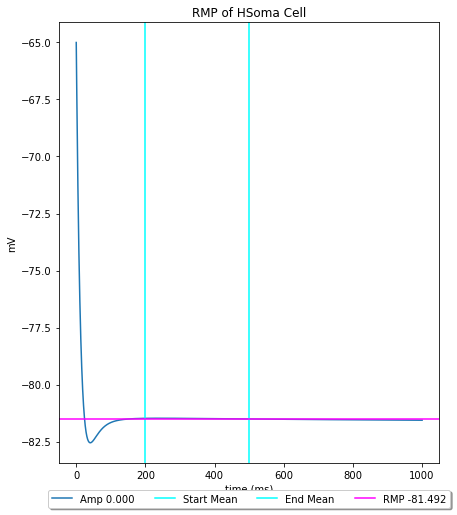

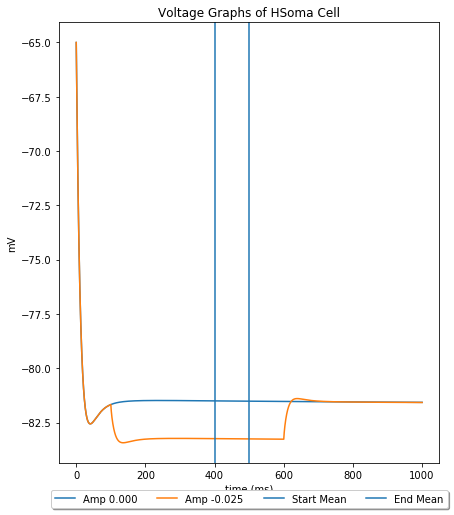

array([[-2.50000000e-02,  6.94746210e+01,  7.68378837e+01]])

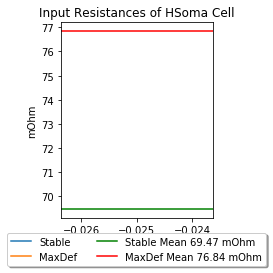

In [3]:
rmp.calculateRMP(HSoma, plot=True)
generic.calculateInputResistance(HSoma, mult=-0.025, iterations=2, plot=True, delay=100, duration=500)

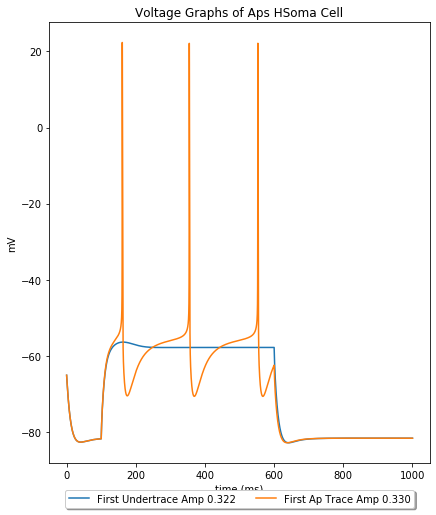

In [4]:
undertrace, overtrace = rheobase.calculateRheobase(HSoma, precisiondigits=2, plot=True, apthreshold = 10) # We have a different apc threshold here

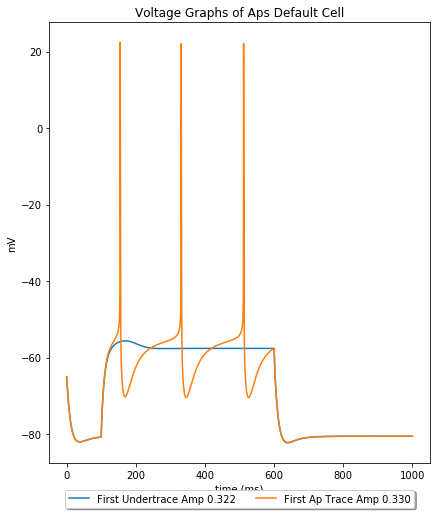

In [5]:
undertrace, overtrace = rheobase.calculateRheobase(Default, precisiondigits=2, plot=True, apthreshold = 10) # We have a different apc threshold here

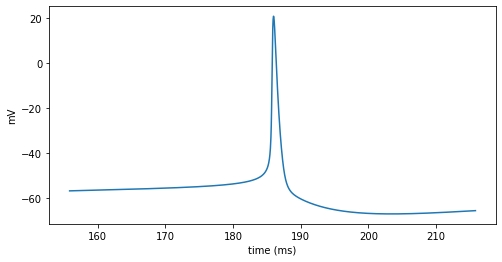

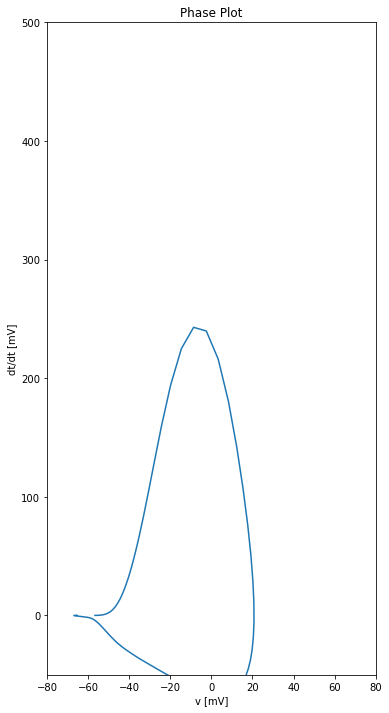

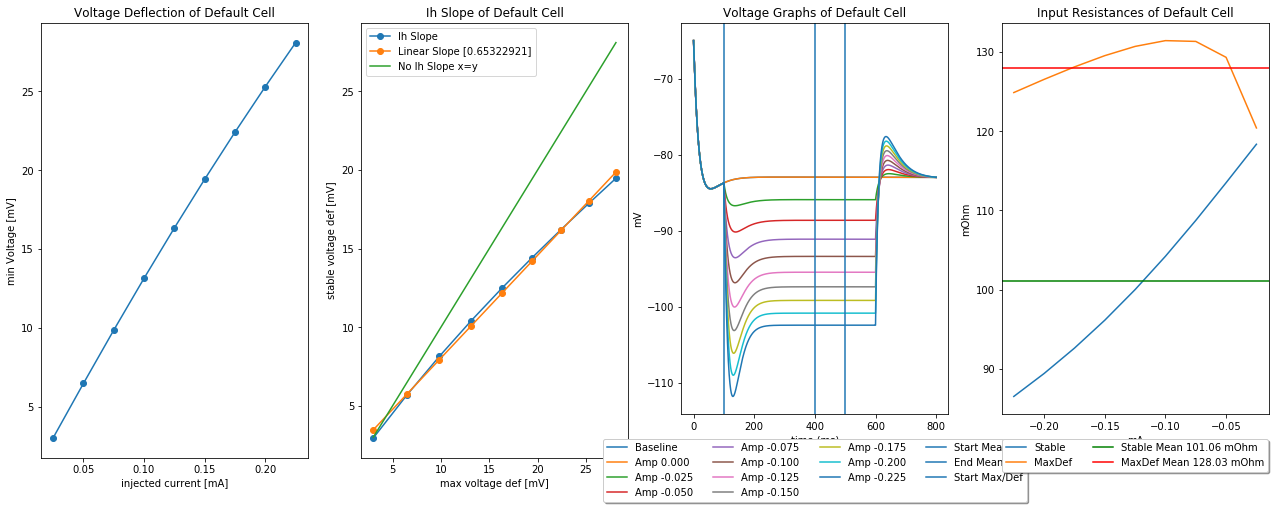

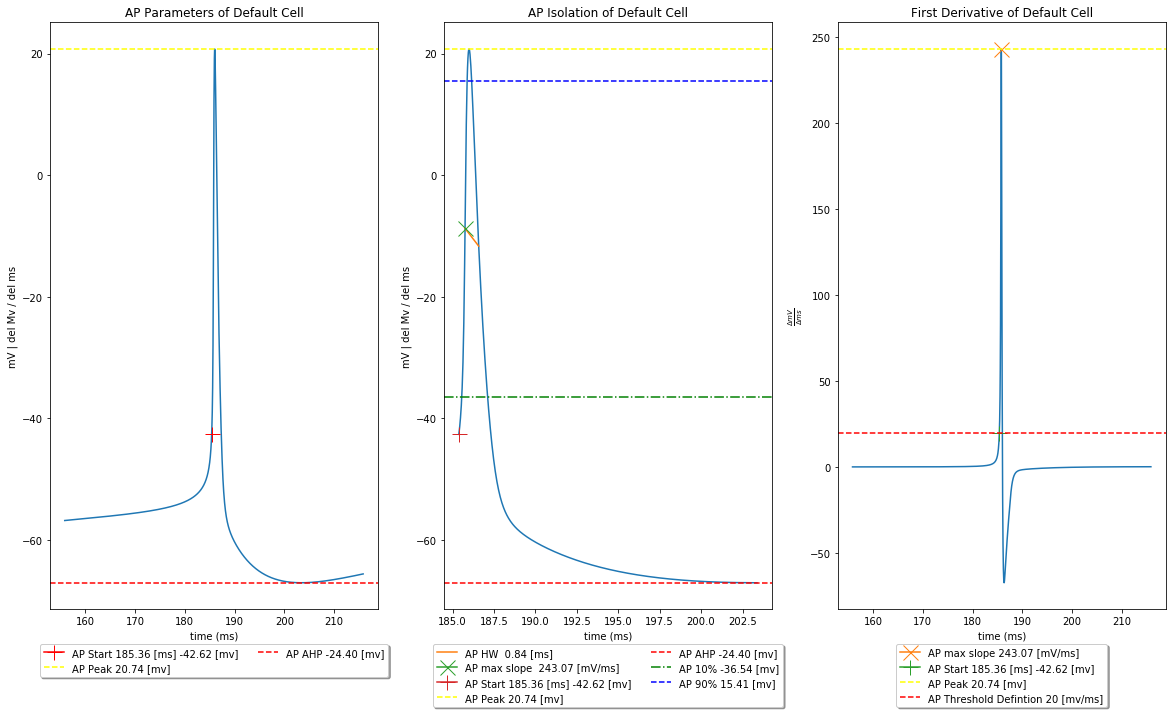

In [8]:
#foundtrace = ap.findFirstApWithinMS(cellbuilder, ms= 15) #is for the approach to get the first ap within ms
aptime = overtrace["aps"][0]
aptrace = generic.isolateTime(overtrace, aptime,30)

generic.plotTrace(aptrace)
phase.phasePlanePlot(aptrace)

ih.calculateInputResistanceAndIhSag(cellbuilder)
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)

In [31]:
overtrace

{'v': array([-65.        , -65.02910582, -65.06092727, ..., -81.00895328,
        -81.00894065, -81.00892803]),
 't': array([0.00000e+00, 2.50000e-02, 5.00000e-02, ..., 7.99950e+02,
        7.99975e+02, 8.00000e+02]),
 'aps': array([154.15 , 321.675, 490.65 ]),
 'cellbuilder': <function __main__.Default()>,
 'params': {'delay': 100, 'dur': 500, 'amp': 0.34720000000000006}}